# Intent classifier

Description

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
train=pd.read_csv('/content/drive/MyDrive/intents/train_2.csv')
train

,Unnamed: 0,text,category,entity_type,entity_value,start_offset,end_offset,tags
0,0,how can I cancel purchase 113542617735902?,cancel_order,order_id,113542617735902,26.0,41.0,BIL
1,1,can you help me canceling purchase 00004587345?,cancel_order,order_id,00004587345,35.0,46.0,BIL
2,2,i want assistance to cancel purchase 732201349959,cancel_order,order_id,732201349959,37.0,49.0,BLQ
3,3,i want assistance to cancel order 732201349959,cancel_order,order_id,732201349959,34.0,46.0,BQ
4,4,"I don't want my last item, help me cancel orde...",cancel_order,order_id,370795561790,48.0,60.0,BCLN
...,...,...,...,...,...,...,...,...
6475,6475,I am waiting for a rebate of 299 dollars,track_refund,refund_amount,299,29.0,32.0,BL
6476,6476,I am waiting for a compensation of 1200 dollars,track_refund,refund_amount,1200,35.0,39.0,BL
6477,6477,I expect a compensation of 160 dollars,track_refund,refund_amount,160,27.0,30.0,BL
6478,6478,I am wating for a reimbursement of $350,track_refund,refund_amount,350,36.0,39.0,BLZ


In [ ]:
test=pd.read_csv('/content/drive/MyDrive/intents/test_2.csv')

# EDA

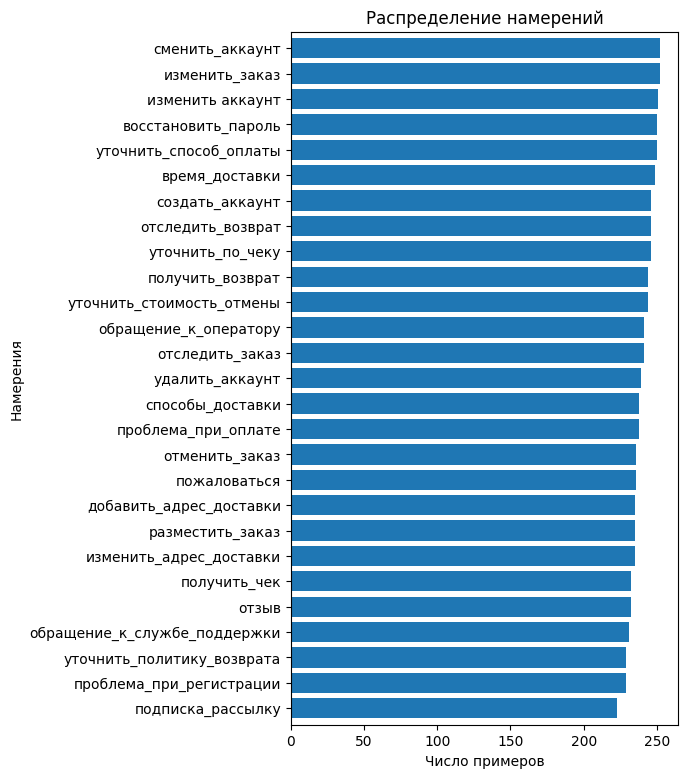

In [ ]:
import matplotlib.pyplot as plt

value_counts = train.category.value_counts()

sorted_counts = value_counts.sort_values()

plt.figure(figsize=(5, 9))
sorted_counts.plot(kind='barh', width=0.8)
plt.xlabel('Число примеров')
plt.ylabel('Намерения')
plt.title('Распределение намерений')
plt.show()


In [ ]:
train = train.drop('category', axis=1)

In [ ]:
train = train.rename(columns={"intent":"category", "utterance":"text"})

In [ ]:
train['category'].unique()

array(['cancel_order', 'change_order', 'change_shipping_address',
       'check_cancellation_fee', 'check_invoice', 'check_payment_methods',
       'check_refund_policy', 'complaint', 'contact_customer_service',
       'contact_human_agent', 'create_account', 'delete_account',
       'delivery_options', 'delivery_period', 'edit_account',
       'get_invoice', 'get_refund', 'newsletter_subscription',
       'payment_issue', 'place_order', 'recover_password',
       'registration_problems', 'review', 'set_up_shipping_address',
       'switch_account', 'track_order', 'track_refund'], dtype=object)

In [ ]:
train['category'] = train['category'].replace({
    "cancel_order":"отменить_заказ",
    "change_order":"изменить_заказ",
    "change_shipping_address":"изменить_адрес_доставки",
    "check_cancellation_fee":"уточнить_стоимость_отмены",
    "check_invoice":"уточнить_по_чеку",
    "check_payment_methods":"уточнить_способ_оплаты",
    "check_refund_policy":"уточнить_политику_возврата",
    "create_account":"создать_аккаунт",
    "delete_account":"удалить_аккаунт",
    "delivery_options":"способы_доставки",
    "get_refund":"получить_возврат",
    "newsletter_subscription":"подписка_рассылку",
    "payment_issue":"проблема_при_оплате",
    "place_order":"разместить_заказ",
    "recover_password":"восстановить_пароль",
    "registration_problems":"проблема_при_регистрации",
    "review":"отзыв",
    "delivery_period":"время_доставки",
    "edit_account":"изменить аккаунт",
    "contact_human_agent":"обращение_к_оператору",
    "contact_customer_service":"обращение_к_службе_поддержки",
    "complaint":"пожаловаться",
    "set_up_shipping_address":"добавить_адрес_доставки",
    "switch_account":"сменить_аккаунт",
    "track_refund":"отследить_возврат",
    "get_invoice":"получить_чек",
    "track_order":"отследить_заказ"})

In [ ]:
test = test.drop('category', axis=1)

In [ ]:
test = test.rename(columns={"intent":"category", "utterance":"text"})

In [ ]:
train

,Unnamed: 0,text,category,entity_type,entity_value,start_offset,end_offset,tags
0,0,how can I cancel purchase 113542617735902?,отменить_заказ,order_id,113542617735902,26.0,41.0,BIL
1,1,can you help me canceling purchase 00004587345?,отменить_заказ,order_id,00004587345,35.0,46.0,BIL
2,2,i want assistance to cancel purchase 732201349959,отменить_заказ,order_id,732201349959,37.0,49.0,BLQ
3,3,i want assistance to cancel order 732201349959,отменить_заказ,order_id,732201349959,34.0,46.0,BQ
4,4,"I don't want my last item, help me cancel orde...",отменить_заказ,order_id,370795561790,48.0,60.0,BCLN
...,...,...,...,...,...,...,...,...
6475,6475,I am waiting for a rebate of 299 dollars,отследить_возврат,refund_amount,299,29.0,32.0,BL
6476,6476,I am waiting for a compensation of 1200 dollars,отследить_возврат,refund_amount,1200,35.0,39.0,BL
6477,6477,I expect a compensation of 160 dollars,отследить_возврат,refund_amount,160,27.0,30.0,BL
6478,6478,I am wating for a reimbursement of $350,отследить_возврат,refund_amount,350,36.0,39.0,BLZ


# токенайзер + CNN

In [ ]:
!pip install keras_preprocessing

In [ ]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn import preprocessing

MAX_SEQUENCE_LENGTH = 50
MAX_NUM_WORDS = 5000

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(train['text'])
sequences = tokenizer.texts_to_sequences(train['text'])

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

label_transformer = preprocessing.LabelEncoder()
label_transformer.fit(train['category'])
labels = label_transformer.transform(train['category'])
labels = to_categorical(np.asarray(labels))

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 1296 unique tokens.
Shape of data tensor: (6480, 50)
Shape of label tensor: (6480, 27)


In [ ]:
import json

VALIDATION_SPLIT = 0.15
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
x_val = data[-num_validation_samples:]
y_val = labels[-num_validation_samples:]

In [ ]:
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding, Flatten
from keras.models import Model
from keras.models import Sequential
from keras.initializers import Constant
EMBEDDING_DIM = 100
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
embedding_layer = Embedding(num_words,EMBEDDING_DIM,input_length=MAX_SEQUENCE_LENGTH,trainable=True)

In [ ]:
print('Training model.')
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(64, 3, activation='relu')(embedded_sequences)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(2)(x)

x=Flatten()(x)
x = Dense(750, activation='relu')(x)
x = Dense(250, activation='relu')(x)
preds = Dense(27, activation='softmax')(x)

model = Model(sequence_input, preds)

Training model.


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['acc'])

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 100)           129700    
                                                                 
 conv1d_4 (Conv1D)           (None, 48, 64)            19264     
                                                                 
 conv1d_5 (Conv1D)           (None, 46, 64)            12352     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 23, 64)            0         
 g1D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1472)              0         
                                                           

In [ ]:
s=0.0
for i in range (1,10):
    model.fit(x_train, y_train,batch_size=128, epochs=20, validation_data=(x_val, y_val))
    scores = model.evaluate(x_val, y_val, verbose=0)
    s=s+(scores[1]*100)

Epoch 1/20
46/46 [==============================] - 15s 92ms/step - loss: 3.1866 - acc: 0.0929 - val_loss: 2.9297 - val_acc: 0.1481
Epoch 2/20
46/46 [==============================] - 2s 34ms/step - loss: 1.7584 - acc: 0.4544 - val_loss: 1.2584 - val_acc: 0.6065
Epoch 3/20
46/46 [==============================] - 1s 22ms/step - loss: 0.7842 - acc: 0.7539 - val_loss: 0.6169 - val_acc: 0.8318
Epoch 4/20
46/46 [==============================] - 1s 19ms/step - loss: 0.3633 - acc: 0.8963 - val_loss: 0.3879 - val_acc: 0.8858
Epoch 5/20
46/46 [==============================] - 1s 13ms/step - loss: 0.1947 - acc: 0.9436 - val_loss: 0.2187 - val_acc: 0.9475
Epoch 6/20
46/46 [==============================] - 1s 16ms/step - loss: 0.1053 - acc: 0.9702 - val_loss: 0.1565 - val_acc: 0.9614
Epoch 7/20
46/46 [==============================] - 1s 12ms/step - loss: 0.0570 - acc: 0.9854 - val_loss: 0.2353 - val_acc: 0.9491
Epoch 8/20
46/46 [==============================] - 1s 12ms/step - loss: 0.0476 - 

In [ ]:
s/10

88.0092602968216

In [ ]:
scores = model.evaluate(x_val, y_val, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 97.69%


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X_test, y_test = test['text'], test['category']

sequences_new = tokenizer.texts_to_sequences(X_test)
data = pad_sequences(sequences_new, maxlen=MAX_SEQUENCE_LENGTH)

yprob = model.predict(data)
yclasses=yprob.argmax(axis=-1)
y_pred = label_transformer.inverse_transform(yclasses)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")

26/26 [==============================] - 0s 5ms/step
Accuracy: 0.9777777777777777
Precision: 0.9789905518190258
Recall: 0.9777777777777777
F1-score: 0.9778453446183331
Confusion Matrix:


In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyo
import numpy as np
import pandas as pd
import seaborn as sns

class_labels = train['category'].unique()

tickvals = list(range(len(class_labels)))
ticktext = class_labels

heatmap = go.Heatmap(z=confusion,
                     x=tickvals,
                     y=tickvals,
                     x0=0.5,
                     y0=0.5,
                     colorscale='Blues',
                     zmin=0,
                     zmax=50,
                     colorbar=dict(title='Count'),
                     hoverongaps=False)

layout = go.Layout(
    title='Confusion Matrix',
    xaxis=dict(title='Predicted', tickvals=tickvals, ticktext=ticktext),
    yaxis=dict(title='True', tickvals=tickvals, ticktext=ticktext, automargin=True),
    height=800
)

fig = go.Figure(data=[heatmap], layout=layout)

pyo.iplot(fig)


# LaBSE + simple network

In [ ]:
!pip install transformers sentence_transformers

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sentence_transformers import SentenceTransformer
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

train_texts, test_texts, train_labels, test_labels = train_test_split(
    train['text'], train['category'], test_size=0.15, random_state=42)

model = SentenceTransformer('LaBSE')

train_embeddings = model.encode(train_texts.to_list()).astype(np.float32)
test_embeddings = model.encode(test_texts.to_list()).astype(np.float32)

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels.tolist())
test_labels = label_encoder.transform(test_labels.tolist())


In [ ]:
model_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                49216     
                                                                 
 dense_10 (Dense)            (None, 27)                1755      
                                                                 
Total params: 50971 (199.11 KB)
Trainable params: 50971 (199.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_nn = Sequential()
model_nn.add(Dense(64, activation='relu', input_shape=(train_embeddings.shape[1],)))
model_nn.add(Dense(len(label_encoder.classes_), activation='softmax'))

model_nn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_nn.fit(train_embeddings, train_labels, validation_data=(test_embeddings, test_labels), epochs=30, batch_size=64)

loss, accuracy = model_nn.evaluate(test_embeddings, test_labels)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/30
87/87 [==============================] - 1s 5ms/step - loss: 2.7458 - accuracy: 0.5897 - val_loss: 1.9720 - val_accuracy: 0.8344
Epoch 2/30
87/87 [==============================] - 0s 4ms/step - loss: 1.3120 - accuracy: 0.9061 - val_loss: 0.7951 - val_accuracy: 0.9599
Epoch 3/30
87/87 [==============================] - 0s 5ms/step - loss: 0.5573 - accuracy: 0.9673 - val_loss: 0.3992 - val_accuracy: 0.9846
Epoch 4/30
87/87 [==============================] - 0s 5ms/step - loss: 0.3046 - accuracy: 0.9788 - val_loss: 0.2527 - val_accuracy: 0.9794
Epoch 5/30
87/87 [==============================] - 0s 5ms/step - loss: 0.1978 - accuracy: 0.9820 - val_loss: 0.1757 - val_accuracy: 0.9866
Epoch 6/30
87/87 [==============================] - 0s 5ms/step - loss: 0.1426 - accuracy: 0.9858 - val_loss: 0.1327 - val_accuracy: 0.9897
Epoch 7/30
87/87 [==============================] - 0s 5ms/step - loss: 0.1089 - accuracy: 0.9893 - val_loss: 0.1051 - val_accuracy: 0.9907
Epoch 8/30
87/87 [==

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X_test, y_test = test['text'], test['category']

test_embeddings = model.encode(X_test.to_list()).astype(np.float32)
test_labels = label_encoder.transform(y_test.tolist())

yprob = model_nn.predict(test_embeddings)
yclasses=yprob.argmax(axis=-1)
y_pred = label_encoder.inverse_transform(yclasses)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")

26/26 [==============================] - 0s 5ms/step
Accuracy: 0.9938271604938271
Precision: 0.9939409954763659
Recall: 0.9938271604938271
F1-score: 0.9938191157952414
Confusion Matrix:


In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyo
import numpy as np
import pandas as pd
import seaborn as sns

class_labels = train['category'].unique()

tickvals = list(range(len(class_labels)))
ticktext = class_labels

heatmap = go.Heatmap(z=confusion,
                     x=tickvals,
                     y=tickvals,
                     x0=0.5,
                     y0=0.5,
                     colorscale='Blues',
                     zmin=0,
                     zmax=50,
                     colorbar=dict(title='Count'),
                     hoverongaps=False)

layout = go.Layout(
    title='Confusion Matrix',
    xaxis=dict(title='Predicted', tickvals=tickvals, ticktext=ticktext),
    yaxis=dict(title='True', tickvals=tickvals, ticktext=ticktext, automargin=True),
    height=800
)

fig = go.Figure(data=[heatmap], layout=layout)

pyo.iplot(fig)


# Tokenizer + Attention layers with BiLSTM

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

x_train, x_test, y_train, y_test = train_test_split(
    train['text'], train['category'], test_size=0.15, random_state=42)

label_encoder = LabelEncoder()
label_encoder.fit(train['category'].tolist())

y_train_labels = label_encoder.transform(y_train.tolist())
y_test_labels = label_encoder.transform(y_test.tolist())

test_text = test['text']
test_labels = label_encoder.transform(test['category'].tolist())

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Attention, Concatenate, Flatten
from tensorflow.keras.models import Model

texts = x_train
labels = y_train_labels

max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=100)


input_layer = Input(shape=(100,))
embedding_layer = Embedding(input_dim=max_words, output_dim=200)(input_layer)
bi_lstm = Bidirectional(LSTM(64, return_sequences=True))(embedding_layer)
attention = Attention()([bi_lstm, bi_lstm])
concatenated = Concatenate()([bi_lstm, attention])
flatten = Flatten()(concatenated)
output_layer = Dense(len(set(labels)), activation='softmax')(flatten)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


labels = np.array(labels)
model.fit(padded_sequences, labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
69/69 [==============================] - 29s 259ms/step - loss: 2.5759 - accuracy: 0.3198 - val_loss: 0.9890 - val_accuracy: 0.6552
Epoch 2/10
69/69 [==============================] - 7s 100ms/step - loss: 0.3702 - accuracy: 0.8888 - val_loss: 0.2030 - val_accuracy: 0.9428
Epoch 3/10
69/69 [==============================] - 2s 31ms/step - loss: 0.0998 - accuracy: 0.9771 - val_loss: 0.1021 - val_accuracy: 0.9728
Epoch 4/10
69/69 [==============================] - 2s 22ms/step - loss: 0.0347 - accuracy: 0.9939 - val_loss: 0.0740 - val_accuracy: 0.9800
Epoch 5/10
69/69 [==============================] - 3s 50ms/step - loss: 0.0186 - accuracy: 0.9959 - val_loss: 0.0697 - val_accuracy: 0.9855
Epoch 6/10
69/69 [==============================] - 4s 51ms/step - loss: 0.0080 - accuracy: 0.9980 - val_loss: 0.0885 - val_accuracy: 0.9809
Epoch 7/10
69/69 [==============================] - 3s 38ms/step - loss: 0.0094 - accuracy: 0.9975 - val_loss: 0.0753 - val_accuracy: 0.9828
Epoch 8/10

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

sequences = tokenizer.texts_to_sequences(test_text)
padded_sequences = pad_sequences(sequences, maxlen=100)

yprob = model.predict(padded_sequences)
yclasses=yprob.argmax(axis=-1)
y_pred = label_encoder.inverse_transform(yclasses)

accuracy = accuracy_score(test_labels, yclasses)
precision = precision_score(test_labels, yclasses, average='weighted')
recall = recall_score(test_labels, yclasses, average='weighted')
f1 = f1_score(test_labels, yclasses, average='weighted')
confusion = confusion_matrix(test_labels, yclasses)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")

26/26 [==============================] - 1s 7ms/step
Accuracy: 0.980246913580247
Precision: 0.9824294660338021
Recall: 0.980246913580247
F1-score: 0.9802660410084976
Confusion Matrix:


In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyo
import numpy as np
import pandas as pd
import seaborn as sns

class_labels = train['category'].unique()

tickvals = list(range(len(class_labels)))
ticktext = class_labels

heatmap = go.Heatmap(z=confusion,
                     x=tickvals,
                     y=tickvals,
                     x0=0.5,
                     y0=0.5,
                     colorscale='Blues',
                     zmin=0,
                     zmax=50,
                     colorbar=dict(title='Count'),
                     hoverongaps=False)

layout = go.Layout(
    title='Confusion Matrix',
    xaxis=dict(title='Predicted', tickvals=tickvals, ticktext=ticktext),
    yaxis=dict(title='True', tickvals=tickvals, ticktext=ticktext, automargin=True),
    height=800
)

fig = go.Figure(data=[heatmap], layout=layout)
pyo.iplot(fig)


# TF-IDF vectorizer + XGBoost

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

X = train["text"]
y = train["category"]

y_labels = label_encoder.transform(y.values)

X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=1000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

xgb_classifier = xgb.XGBClassifier()

xgb_classifier.fit(X_train_tfidf, y_train, verbose=1)

y_pred = xgb_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")

Accuracy: 0.9606481481481481
Precision: 0.9618118071545979
Recall: 0.9606481481481481
F1-score: 0.9607802478500475
Confusion Matrix:


In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyo
import numpy as np
import pandas as pd
import seaborn as sns

class_labels = train['category'].unique()

tickvals = list(range(len(class_labels)))
ticktext = class_labels

heatmap = go.Heatmap(z=confusion,
                     x=tickvals,
                     y=tickvals,
                     x0=0.5,
                     y0=0.5,
                     colorscale='Blues',
                     zmin=0,
                     zmax=50,
                     colorbar=dict(title='Count'),
                     hoverongaps=False)

layout = go.Layout(
    title='Confusion Matrix',
    xaxis=dict(title='Predicted', tickvals=tickvals, ticktext=ticktext),
    yaxis=dict(title='True', tickvals=tickvals, ticktext=ticktext, automargin=True),
    height=800
)

fig = go.Figure(data=[heatmap], layout=layout)

pyo.iplot(fig)


# Glove + CNN

In [ ]:
!pip install keras.preprocessing

In [ ]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from keras.models import Sequential

texts = x_train
labels = y_train_labels

num_labels=27


tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
vocab_size = len(tokenizer.word_index) + 1

sequences = tokenizer.texts_to_sequences(texts)
max_sequence_length = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_sequence_length)


embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))


glove_file = '/content/drive/MyDrive/intents/glove.6B.100d.txt'
with open(glove_file, 'r', encoding='utf-8') as f:
    for line in f:
        word, *vector = line.split()
        if word in tokenizer.word_index:
            idx = tokenizer.word_index[word]
            embedding_matrix[idx] = np.array(vector, dtype=np.float32)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_labels, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

y = to_categorical(labels)

model.fit(X, y, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
69/69 [==============================] - 3s 10ms/step - loss: 2.8487 - accuracy: 0.2154 - val_loss: 1.9049 - val_accuracy: 0.6851
Epoch 2/20
69/69 [==============================] - 0s 5ms/step - loss: 1.5125 - accuracy: 0.6026 - val_loss: 0.7013 - val_accuracy: 0.8875
Epoch 3/20
69/69 [==============================] - 0s 5ms/step - loss: 0.7839 - accuracy: 0.7894 - val_loss: 0.3413 - val_accuracy: 0.9383
Epoch 4/20
69/69 [==============================] - 1s 7ms/step - loss: 0.4647 - accuracy: 0.8831 - val_loss: 0.2245 - val_accuracy: 0.9564
Epoch 5/20
69/69 [==============================] - 1s 9ms/step - loss: 0.3267 - accuracy: 0.9133 - val_loss: 0.1588 - val_accuracy: 0.9537
Epoch 6/20
69/69 [==============================] - 1s 10ms/step - loss: 0.2360 - accuracy: 0.9389 - val_loss: 0.1277 - val_accuracy: 0.9637
Epoch 7/20
69/69 [==============================] - 1s 9ms/step - loss: 0.1961 - accuracy: 0.9519 - val_loss: 0.1128 - val_accuracy: 0.9719
Epoch 8/20
69/69 [

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

sequences = tokenizer.texts_to_sequences(test_text)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

yprob = model.predict(padded_sequences)
yclasses=yprob.argmax(axis=-1)
y_pred = label_encoder.inverse_transform(yclasses)

accuracy = accuracy_score(test_labels, yclasses)
precision = precision_score(test_labels, yclasses, average='weighted')
recall = recall_score(test_labels, yclasses, average='weighted')
f1 = f1_score(test_labels, yclasses, average='weighted')
confusion = confusion_matrix(test_labels, yclasses)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")

26/26 [==============================] - 0s 6ms/step
Accuracy: 0.9827160493827161
Precision: 0.9840811258411061
Recall: 0.9827160493827161
F1-score: 0.9827930822093106
Confusion Matrix:


In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyo
import numpy as np
import pandas as pd
import seaborn as sns

class_labels = train['category'].unique()

tickvals = list(range(len(class_labels)))
ticktext = class_labels

heatmap = go.Heatmap(z=confusion,
                     x=tickvals,
                     y=tickvals,
                     x0=0.5,
                     y0=0.5,
                     colorscale='Blues',
                     zmin=0,
                     zmax=50,
                     colorbar=dict(title='Count'),
                     hoverongaps=False)

layout = go.Layout(
    title='Confusion Matrix',
    xaxis=dict(title='Predicted', tickvals=tickvals, ticktext=ticktext),
    yaxis=dict(title='True', tickvals=tickvals, ticktext=ticktext, automargin=True),
    height=800
)

fig = go.Figure(data=[heatmap], layout=layout)

pyo.iplot(fig)


# BertTokenizer + BertClassifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW

X = x_train
y = y_train_labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=len(train['category'].unique()))

class CustomDataset(Dataset):
    def __init__(self, text, labels, tokenizer, max_len):
        self.text = text
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, item):
        text = str(self.text.iloc[item])
        label = self.labels[item]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }


max_len = 128
train_dataset = CustomDataset(X_train, y_train, tokenizer, max_len)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)


device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
optimizer = AdamW(model.parameters(), lr=1e-5)

for epoch in range(3):
    model.train()
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()


model.eval()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

test_dataset = CustomDataset(test_text, test_labels, tokenizer, max_len)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

all_preds = []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels']

        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)
        all_preds.extend(preds.cpu().numpy())

print(classification_report(test_labels, all_preds))

accuracy = accuracy_score(test_labels, all_preds)
precision = precision_score(test_labels, all_preds, average='weighted')
recall = recall_score(test_labels, all_preds, average='weighted')
f1 = f1_score(test_labels, all_preds, average='weighted')
confusion = confusion_matrix(test_labels, all_preds)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        29
           1       0.95      0.95      0.95        21
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        27
           4       0.96      0.96      0.96        26
           5       1.00      1.00      1.00        20
           6       1.00      0.97      0.99        40
           7       1.00      1.00      1.00        28
           8       1.00      0.93      0.96        41
           9       0.90      1.00      0.95        36
          10       1.00      0.96      0.98        27
          11       0.98      1.00      0.99        40
          12       1.00      1.00      1.00        28
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        28
          15       0.97      0.97      0.97        36
          16       0.96      1.00      0.98        26
          17       1.00    

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyo
import numpy as np
import pandas as pd
import seaborn as sns

class_labels = train['category'].unique()

tickvals = list(range(len(class_labels)))
ticktext = class_labels

heatmap = go.Heatmap(z=confusion,
                     x=tickvals,
                     y=tickvals,
                     x0=0.5,
                     y0=0.5,
                     colorscale='Blues',
                     zmin=0,
                     zmax=50,
                     colorbar=dict(title='Count'),
                     hoverongaps=False)

layout = go.Layout(
    title='Confusion Matrix',
    xaxis=dict(title='Predicted', tickvals=tickvals, ticktext=ticktext),
    yaxis=dict(title='True', tickvals=tickvals, ticktext=ticktext, automargin=True),
    height=800
)

fig = go.Figure(data=[heatmap], layout=layout)

pyo.iplot(fig)
